# Assignment #8 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: 
</br>
Date: 
<br>
<br>
**At this time in the semester:** <br>
- We have explored a dataset. <br>
- We have cleaned our dataset. <br>
- We created a Github account with a repository for this class and included a metadata read me file about our data. <br>
- We introduced general SQL syntax, queries, and applications in Python.<br>
- Created our own databases from scratch using MySQL Workbench and Python with SQLAlchemy on our local server and locally on our machine.
- Populated our databases with the data we cleaned at the start of the semester.
<br>

Now we will **JOIN** our knowledge and tables to answer more complex questions about our dataset! We will practice joining tables and understand the importance of using different commands.<br>

JOIN statements are used to combine results from two or more tables based on a related column between them.<br>

Review the powerpoint and readings specified on Blackboard.<br>

In the event your database does not meet the requirements below to answer the question, please use the database provided in Assignment #4 and #5. Remember to credit your data source. <br>

Follow the instructions below to complete the assignment. Write your question you are answering with your data query and visualize your results in a way that fits your data. <br>
Be sure to comment **all** code and answer **all** questions in markdown for full credit.<br>

#### Loading the Packages

In [1]:
import mysql.connector #Connecting to my database
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manipulation
import matplotlib.pyplot as plt #Plots
import seaborn as sns #Plots
import numpy as np

**Data origin:** SQL murder mystery database from assignment 4 and assignment 5 <br>
I chose to use this database because the one I created has 19 foreign keys referencing one table. It became hard to work with in terms of joining tables.
#### Connecting to the database

In [2]:
db_path = "sql-murder-mystery.db"  # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database

#### INNER JOIN (or JOIN)
Display matching records from TWO tables! Choose to combine two tables using inner join. <br>
Write your question you are answering with your data query and visualize your results. <br>
<br>
**Example Question:** What were the songs most listened to during this week in the year 2022?
<br>
**What tables are we joining?** song and listening_history <br> 
<br>

**Question:** How many people with a gold Get Fit Now membership visited the gym during the first seven days of January 2018? <br>
**What tables are we joining?** get_fit_now_member and get_fit_now_check_in

In [3]:
with engine.connect() as connection: #Creates the connection to the database
    query = text ("""SELECT m.membership_status,
                     COUNT(*) AS count_of_gold_members,
                     c.check_in_date
                     FROM get_fit_now_member m
                     JOIN get_fit_now_check_in c ON m.id = c.membership_id
                     WHERE c.check_in_date BETWEEN '20180101' and '20180107'
                     AND m.membership_status = 'gold'
                     GROUP BY check_in_date""")
                     #Selects the membership status from the Get Fit Now member table and select the check-in date from the Get Fit Now check-in table
                     #Joints the tables by the get fit now member ID and the get fit now check-in membership ID
                     #Where the check-in date is between Jan. 01, 2018, and Jan. 07, 2018, the membership status is gold and groups by the check-in date
    join_query = pd.read_sql(query, connection) #Reads the query with connection to the database

join_query #Prints the results                    

,membership_status,count_of_gold_members,check_in_date
0,gold,1,20180101
1,gold,1,20180102
2,gold,3,20180103
3,gold,1,20180104
4,gold,2,20180105


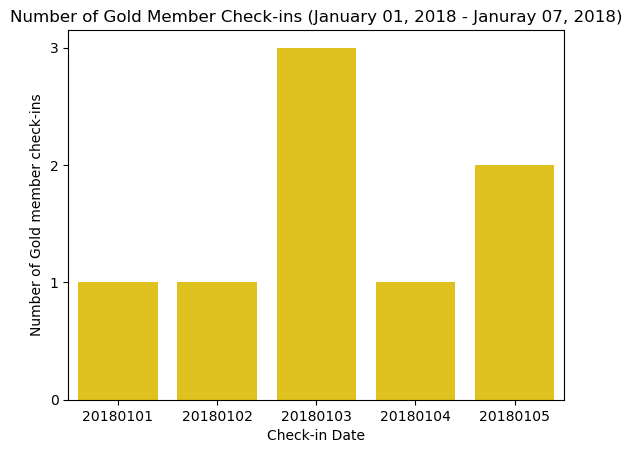

In [4]:
sns.barplot(data = join_query, x = "check_in_date", y = "count_of_gold_members", color = "gold")
plt.title("Number of Gold Member Check-ins (January 01, 2018 - Januray 07, 2018)")
plt.xlabel("Check-in Date")
plt.ylabel("Number of Gold member check-ins")
plt.yticks(np.arange(0, 3+1, 1))
plt.show()

#### LEFT JOIN
<br>
Returns ALL records from the left table and matching records from the right table. Write your question you are answering with your data query and visualize your results.<br>
<br>
Question: What street has the highest individual incomes? <br>
What tables are we joining? person and drivers_license

In [5]:
with engine.connect() as connection: #Creates the connection
    query = text("""SELECT p.address_street_name,
                    SUM(ic.annual_income) as total_street_income
                    FROM person p
                    LEFT JOIN income ic ON p.ssn = ic.ssn
                    GROUP BY address_street_name
                    ORDER BY total_street_income DESC
                    LIMIT 10""")
                    #Selects the address_street_name from the person table and sums the annual income
                    #Left joins the income table by the ssn from the person and the ssn from the income table
                    #Groups by the address street name, orders by the total street income in descending order, and limits it to the top ten total incomes
    left_query = pd.read_sql(query, connection) #Reads the query with connection to the database

left_query #Prints the results

,address_street_name,total_street_income
0,Northwestern Dr,1841200
1,Franklin Ave,1632000
2,Wattles Circle,521500
3,S Book Way,498500
4,Nethercourt Ave,489800
5,N Kiona Dr,486600
6,Ramsden Park St,476300
7,Powhatan Beach Rd,475700
8,Wooden Spoke Rd,473100
9,Purnell Way,448000


C:\Users\madis\AppData\Local\Temp\ipykernel_16964\2861719967.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_query, x = "total_street_income", y = "address_street_name", palette = "Greens_d")


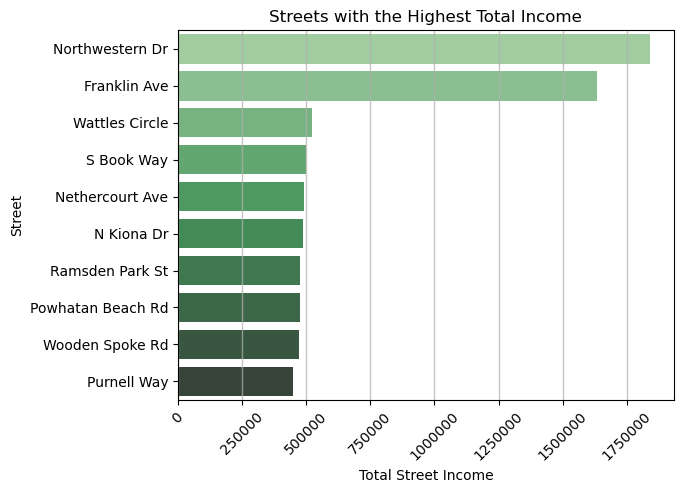

In [6]:
sns.barplot(data=left_query, x = "total_street_income", y = "address_street_name", palette = "Greens_d")
plt.title("Streets with the Highest Total Income")
plt.xlabel("Total Street Income")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True, axis='x', linestyle='-', linewidth=1, alpha=0.75)
plt.ylabel("Street")
plt.show()

#### RIGHT JOIN
<br>
Returns ALL records from the right table and matching records from the left table. Write your question you are answering with your data query and visualize your results. <br>
<br>
**Question:** What type of car is most prevalent on Northwestern Dr and Franklin Ave? 
<br>
**What tables are we joining?** person and drivers_license 

In [7]:
with engine.connect() as connection: #Creates the connection
    query = text("""SELECT p.address_street_name,
                    dl.car_make,
                    COUNT(*) AS count
                    FROM person p
                    RIGHT JOIN drivers_license dl ON p.license_id = dl.id
                    WHERE p.address_street_name IN ('Northwestern Dr', 'Franklin Ave')
                    GROUP BY p.address_street_name, dl.car_make
                    ORDER BY count DESC
                    LIMIT 20""")
                    #Selects the address street name from the person table, car make for the driver's license table and counts 
                    #the occurrences of the car makes
                    #Right joins drivers_licesne table by the license_id from the person table to the id from the driver's license table
                    #Where address_street_name equals Northwestern Dr or Franklin Ave, groups by address street name and car make, 
                    #orders by count in descending order and limits to 20
    right_query = pd.read_sql(query, connection) #Reads the query with connection to the database

right_query #Prints the results

,address_street_name,car_make,count
0,Franklin Ave,Chevrolet,5
1,Franklin Ave,Toyota,5
2,Franklin Ave,Dodge,4
3,Northwestern Dr,BMW,4
4,Northwestern Dr,Ford,4
5,Northwestern Dr,GMC,4
6,Northwestern Dr,Mazda,4
7,Northwestern Dr,Mercedes-Benz,4
8,Franklin Ave,BMW,3
9,Franklin Ave,Mazda,3


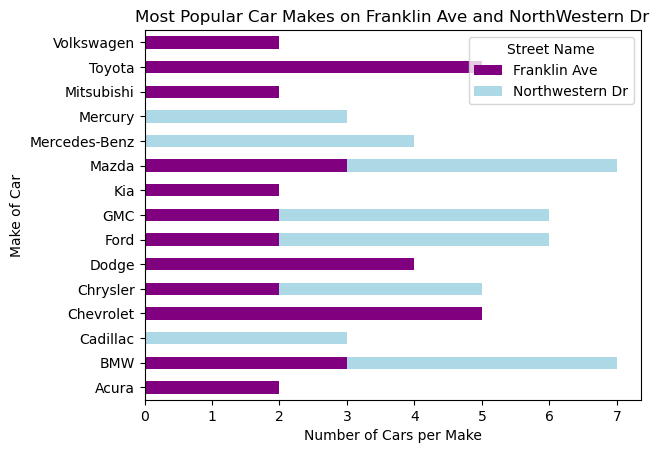

In [8]:
#To create a stacked bar graph in the way I want, the data needs to be pivoted
pivot = right_query.pivot(index = "car_make", columns = "address_street_name", values = "count").fillna(0)
    #index = the x or y axis
    #columns = the different colored bars
    #values = the count

ax = pivot.plot(kind = "barh", stacked = True, color = ["purple", "lightblue"])
plt.title("Most Popular Car Makes on Franklin Ave and NorthWestern Dr")
ax.legend(title = "Street Name")
plt.xlabel("Number of Cars per Make")
plt.ylabel("Make of Car")
plt.show()

#### FULL JOIN or UNION of RIGHT JOIN and LEFT JOIN
<br>
Can answer multiple objectives at the same time! Not recommended for large databases. Results may slow your machine or quit before finishing. Write your question you are answering with your data query and visualize your results. <br>
**Question:** Who's income is causing the income inequality between Northwestern Dr, Franklin Ave, and the other streets? <br>
**What tables are we joining?*** person and income

In [9]:
#Because I was using SQLite and a local database, not my database on my server, I had to change how I did FULL JOIN. 
#I did left join and then left join again but reversed. I also did not have to add the additional parenthesis.
with engine.connect() as connection: #Creates the connection
    query = text ("""SELECT 
                             p.name,
                             p.address_street_name,
                             ic.annual_income
                         FROM person p
                         LEFT JOIN income ic ON p.ssn = ic.ssn
                         WHERE p.address_street_name IN ('Northwestern Dr', 'Franklin Ave', 'Purnell Way', 'Wattles Circle', 'S Book Way', 
                         'Nethercourt Ave', 'N Kiona Dr', 'Ramsden Park St',' Powhatan Beach Rd', 'Wooden Spoke Rd')
                     
                     UNION
                     
                     SELECT 
                             p.name,
                             p.address_street_name,
                             ic.annual_income
                         FROM income ic
                         LEFT JOIN person p ON p.ssn = ic.ssn
                         WHERE p.address_street_name IN ('Northwestern Dr', 'Franklin Ave', 'Purnell Way', 'Wattles Circle', 'S Book Way', 
                         'Nethercourt Ave', 'N Kiona Dr', 'Ramsden Park St',' Powhatan Beach Rd', 'Wooden Spoke Rd')
                         
                         ORDER BY annual_income DESC;
                     """)
    full_join_query = pd.read_sql(query, connection)

full_join_query

,name,address_street_name,annual_income
0,Numbers Cranker,S Book Way,498500.0
1,Truman Haaker,Nethercourt Ave,489800.0
2,Felice Prudden,N Kiona Dr,486600.0
3,Dianna Eyster,Ramsden Park St,476300.0
4,Claudio Carlan,Wooden Spoke Rd,473100.0
...,...,...,...
98,Torie Thalmann,Northwestern Dr,NaN
99,Vincenza Burkhardt,Northwestern Dr,NaN
100,William Shiver,Franklin Ave,NaN
101,Yelena Whitler,Franklin Ave,NaN


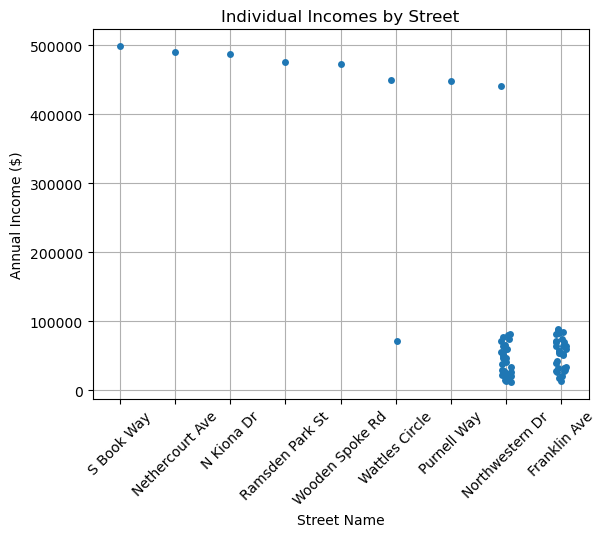

In [10]:
sns.stripplot(data = full_join_query, x = "address_street_name", y = "annual_income", jitter = True)
plt.title("Individual Incomes by Street")
plt.ylabel("Annual Income ($)")
plt.xlabel("Street Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Figure 1:* Most streets do not have multiple annual incomes reported. This is why Northwestern Dr and Franklin Ave have higher total incomes.

In [11]:
# Close your connection :)
connection = engine.connect()
connection.close()